# K2-28b Transmission Spectrum

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import datetime
import matplotlib.dates as mdates
import seaborn as sns; sns.set()
sns.set_context("poster",font_scale=1.2,rc={"font":"helvetica"});
sns.set_style("white"); #sns.set_style("ticks")
cp = sns.color_palette("colorblind") #sns.palplot(current_palette)
%matplotlib inline
%config InlineBackend.figure_format = "retina"
import matplotlib.pyplot as plt
import sys
sys.path.append("../src/")
from matplotlib import rcParams

rcParams["savefig.dpi"] = 100
#rcParams["text.usetex"] = True #uncomment to use tex. Slow, but pretty
#rcParams["font.weight"] = 900

rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['font.weight'] = "normal"
rcParams["axes.formatter.useoffset"] = False
rcParams['xtick.major.width']=1
rcParams['xtick.major.size']=7
rcParams['xtick.minor.width']=1
rcParams['xtick.minor.size']=4
rcParams['ytick.major.width']=1
rcParams['ytick.major.size']=7
rcParams['ytick.minor.width']=1
rcParams['ytick.minor.size']=4

import getpass
# Remove gks paths (not needed for anyone else)
if getpass.getuser()=="gks":
    try:
        sys.path.remove("/Users/gks/Dropbox/mypylib/notebooks/GIT/transitMCMC/src")
        sys.path.remove("/Users/gks/Dropbox/mypylib")
    except Exception as e:
        print(e)
        print("Paths already removed")
from astropy import constants as aconst

# Read in data

14797192.0 3.70883849759e+25 kg 11.305003792 m3 / s2


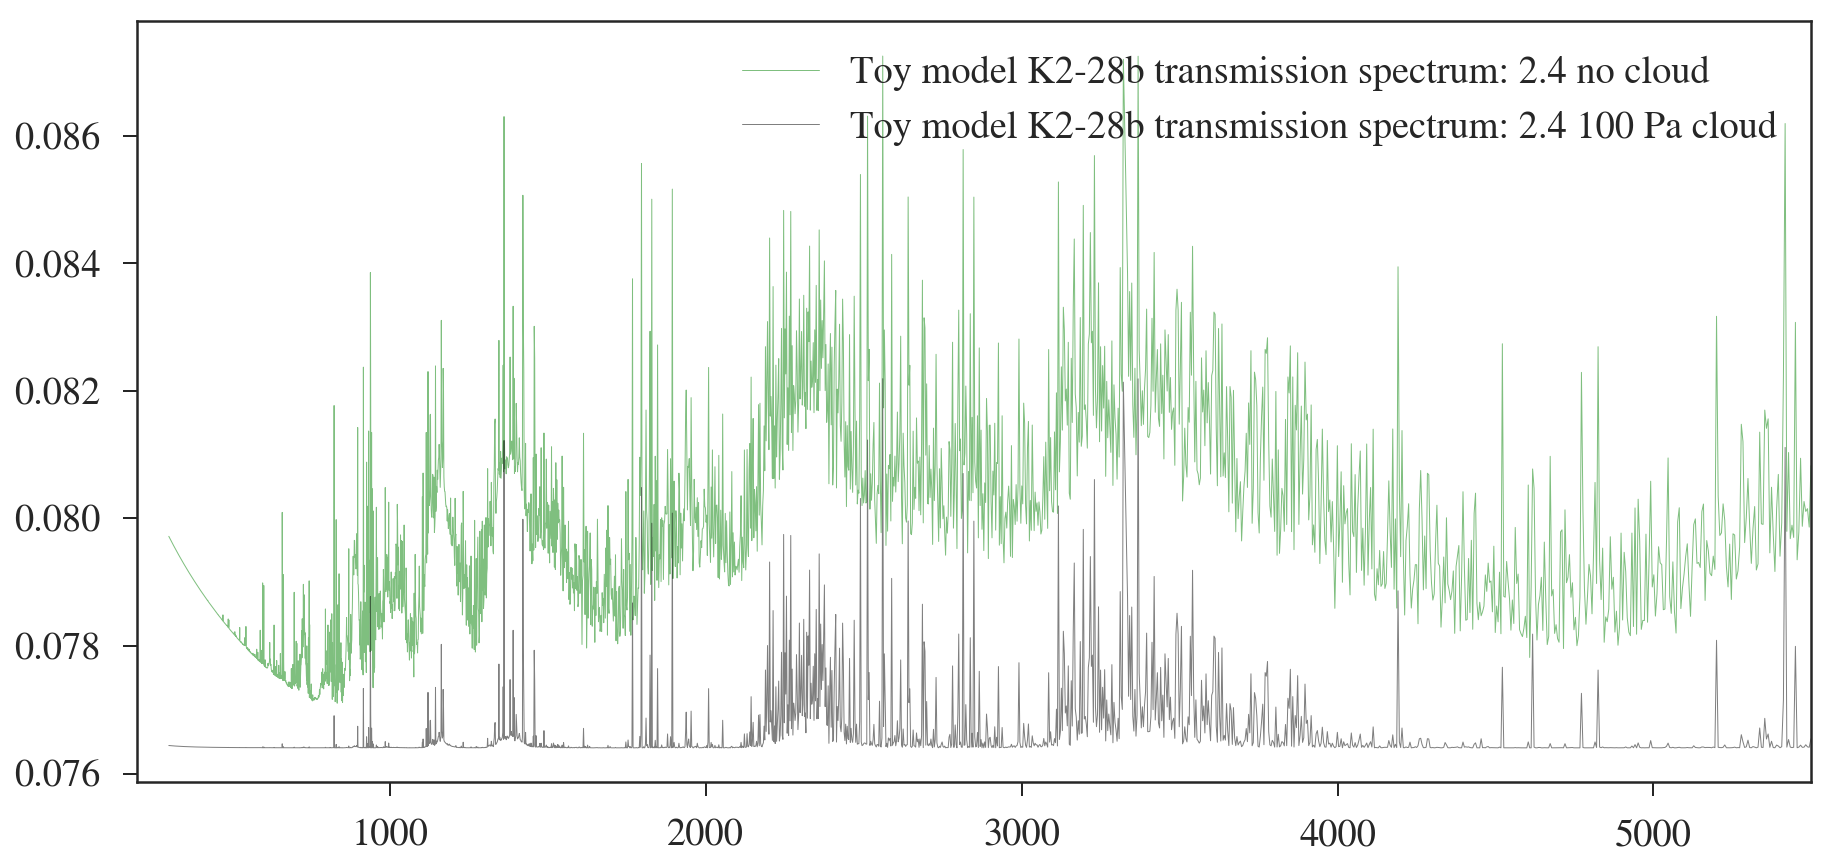

In [2]:
# Data calculated using Pandexo: https://pandexo.emac.gsfc.nasa.gov/ and ExoTransmit
df = pd.read_csv("../data/exo_transmit/k2_28b.dat",sep="\t",comment="#",skiprows=2,names=['Wavelength','Transit Depth'])
df = pd.read_csv("../../Exo_Transmit/Spectra/k2_28b_2.4re_cloud0pa.dat",sep="\t",comment="#",skiprows=2,names=['Wavelength','Transit Depth'])
df1 = pd.read_csv("../../Exo_Transmit/Spectra/k2_28b_2.4re_cloud100pa.dat",sep="\t",comment="#",skiprows=2,names=['Wavelength','Transit Depth'])

fig, ax = plt.subplots(figsize=(15,7))

# Transmission spectrum
ax.plot(df.Wavelength.values*1e9,np.sqrt(df["Transit Depth"].values/100.),lw=0.5,
        label="Toy model K2-28b transmission spectrum: 2.4 no cloud",alpha=0.5,color="g")
# Transmission spectrum
ax.plot(df1.Wavelength.values*1e9,np.sqrt(df1["Transit Depth"].values/100.),lw=0.5,
        label="Toy model K2-28b transmission spectrum: 2.4 100 Pa cloud",alpha=0.5,color="k")

ax.legend(loc='upper right')
ax.set_xlim(200.,5500.)
radius = 14797192. #m
mass = 6.21*aconst.M_earth # kg
grav = mass*aconst.G/(radius**2.) # m/s2
print(radius, mass, grav)

In [3]:
import pickle
import justplotit as jpi
from bokeh.io import output_notebook
output_notebook()

# Load PandExo Data
results = pickle.load(open('../data/pandexo/k2_28bpandexo_run_2.35.pickle', 'rb'))
x,y, e = jpi.jwst_1d_spec(results, R=50, num_tran=5, model=True, x_range=[.8,1.28],output_file='a.html')

Loading BokehJS ...

# Overview Plot 

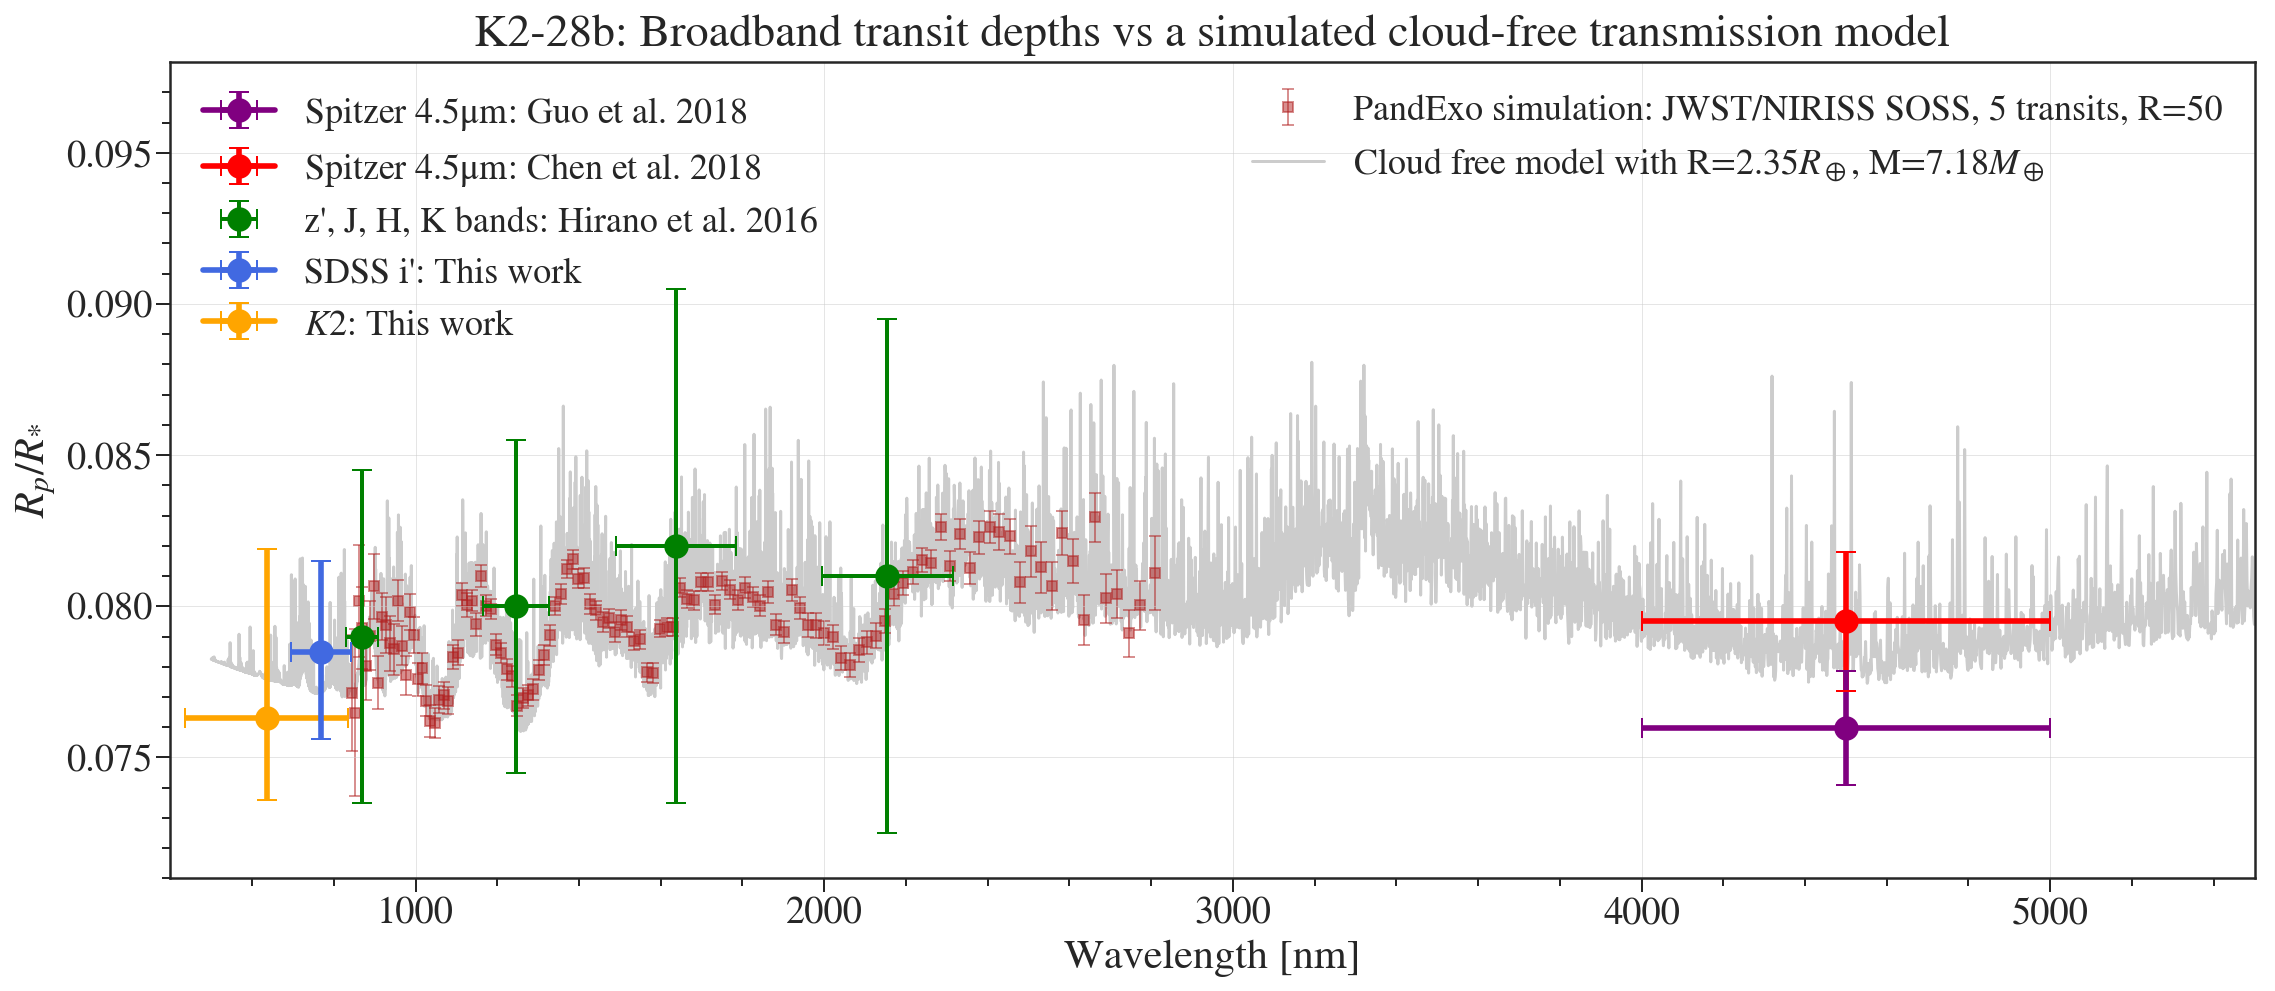

In [4]:
fig, ax = plt.subplots(figsize=(16,7))

# -----------------------------
# K2: this work
ax.errorbar((835.+437.)/2.,0.0763,xerr=(835.-437.)/2.,yerr=np.array([[0.0027],[0.0056]]),barsabove=True,marker="o",
            mew=1.,label=r"$\mathit{K2}$: This work",capsize=5.,capthick=2.,color="orange")

# -----------------------------
# Diffuser assisted: this work
ax.errorbar(768.812,0.0785,xerr=(695.675-841.949)/2.,yerr=np.array([[0.0029],[0.0030]]),barsabove=True,marker="o",
            mew=1.,label="SDSS i': This work",capsize=5.,capthick=2.,color="RoyalBlue")

# -----------------------------
# Hirano et al. 2016
#x_green=[628.780,869.057,1245.996,1638.277,2154.316]
#y_green=[0.063,0.079,0.080,0.082,0.081]
xerr_green = [60.048,39.2555,79.6505,146.9865,160.8575]
yerr_green=[0.01,0.0055,0.0055,0.0085,0.0085]
x_green=[869.057,1245.996,1638.277,2154.316]
y_green=[0.079,0.080,0.082,0.081]
xerr_green = [39.2555,79.6505,146.9865,160.8575]
yerr_green=[0.0055,0.0055,0.0085,0.0085]
ax.errorbar(x_green,y_green,yerr=yerr_green,xerr=xerr_green,barsabove=True,marker="o",
            mew=1.,lw=0,elinewidth=2.,label="z', J, H, K bands: Hirano et al. 2016",
            capsize=5.,capthick=2.,color='green')

# -----------------------------
# Spitzer. Chen et al. 2018
ax.errorbar(4500.,0.0795,xerr=500.,yerr=0.0023,barsabove=True,marker="o",mew=1.,
            label="Spitzer $\mathrm{4.5\mu m}$: Chen et al. 2018",capsize=5.,capthick=2.,color="red")

# -----------------------------
# Spitzer. Guo et al. 2018
ax.errorbar(4500.,np.sqrt(0.005774),xerr=500.,yerr=0.5*np.sqrt(0.005774)*0.000287/0.005774,barsabove=True,marker="o",
            mew=1.,label="Spitzer $\mathrm{4.5\mu m}$: Guo et al. 2018",capsize=5.,capthick=2.,color="purple")

# -----------------------------
# PandExo 
wave = x[0]*1000.
rprs = np.sqrt(y[0])
err  = 0.5*rprs*e[0]/y[0]
ax.errorbar(wave,rprs,err,lw=0,marker='s',elinewidth=1.,mew=1.,capsize=3.,color='firebrick',
            capthick=0.5,markersize=5,alpha=0.5,
            label='PandExo simulation: JWST/NIRISS SOSS, 5 transits, R=50',zorder=-1)
mask = results['OriginalInput']['model_wave'] < 5.5
ax.plot(results['OriginalInput']['model_wave'][mask]*1000.,
        np.sqrt(results['OriginalInput']['model_spec'][mask]),lw=1.5,alpha=0.2,
        color='k',label='Cloud free model with R=$2.35R_\oplus$, M=$7.18M_\oplus$',zorder=-2)

lines, handles = ax.get_legend_handles_labels()

leg1 = ax.legend(np.array(lines)[[6,0]],np.array(handles)[[6,0]],fontsize=18,loc='upper right')
plt.gca().add_artist(leg1)

leg2 = ax.legend(np.array(lines)[[5,4,3,2,1]],np.array(handles)[[5,4,3,2,1]],fontsize=18,loc='upper left')

# Graphics
#ax.legend(loc="upper left",fontsize=16,bbox_to_anchor=(1,1))
ax.grid(lw=0.5,alpha=0.5)
ax.set_xlabel("Wavelength [nm]")
ax.set_ylabel(r"$R_p/R_{*}$")
ax.set_xlim(400.,5500.)
ax.set_ylim(0.071,0.098)
ax.set_title("K2-28b: Broadband transit depths vs a simulated cloud-free transmission model",y=1.005)
ax.minorticks_on()
ax.tick_params(axis='both',pad=2)

# Save
fig.tight_layout()
#fig.subplots_adjust(right=0.65)

fig.savefig("../figures/k2_28b_transmission.pdf",dpi=200)